In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
# --------------------- Data Precess ---------------------
# Reading death data 2014-2018
data_14_18 = pd.read_csv("Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2014-2018.csv", 
                    index_col="Week Ending Date",
                    parse_dates=True)
data_14_18 = data_14_18[["Jurisdiction of Occurrence", "All  Cause"]]
data_14_18 = data_14_18.rename(columns={
    "Jurisdiction of Occurrence" : "location",
    "All  Cause" : "death_total"
})
data_14_18 = data_14_18.rename_axis("date")

In [3]:
data_14_18.head(10)

,location,death_total
date,,
2014-01-04,Alabama,355
2014-01-11,Alabama,872
2014-01-18,Alabama,1044
2014-01-25,Alabama,1022
2014-02-01,Alabama,1040
2014-02-08,Alabama,992
2014-02-15,Alabama,942
2014-02-22,Alabama,990
2014-03-01,Alabama,958


In [4]:
data_19_20 = pd.read_csv("Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020.csv", 
                    index_col="Week Ending Date", 
                    parse_dates=True)
data_19_20 = data_19_20[["Jurisdiction of Occurrence", "All Cause", "COVID-19 (U071, Multiple Cause of Death)"]]
data_19_20 = data_19_20.rename(columns={
    "Jurisdiction of Occurrence" : "location",
    "All Cause" : "death_total",
    "COVID-19 (U071, Multiple Cause of Death)" : "death_covid"
})
data_19_20 = data_19_20.rename_axis("date")

In [5]:
data_19_20.head(10)

,location,death_total,death_covid
date,,,
2019-01-05,Alabama,1077.0,0.0
2019-01-12,Alabama,1090.0,0.0
2019-01-19,Alabama,1114.0,0.0
2019-01-26,Alabama,1063.0,0.0
2019-02-02,Alabama,1095.0,0.0
2019-02-09,Alabama,1092.0,0.0
2019-02-16,Alabama,1103.0,0.0
2019-02-23,Alabama,1064.0,0.0
2019-03-02,Alabama,1050.0,0.0


In [6]:
# Integrate two datasets
data = pd.concat([data_14_18, data_19_20], axis=0)
values = {"death_total" : 0, "death_covid" : 0}
data = data.fillna(value=values)
data["death_non_covid"] = data["death_total"] - data["death_covid"]
data = data.astype({"death_total":"int32", "death_covid":"int32", "death_non_covid":"int32"})
data_covid = pd.pivot_table(data,index="date", columns="location", values="death_covid", fill_value=0).astype(int)
data_total = pd.pivot_table(data,index="date", columns="location", values="death_total", fill_value=0).astype(int)
data_non_covid = pd.pivot_table(data,index="date", columns="location", values="death_non_covid", fill_value=0).astype(int)

In [7]:
data

,location,death_total,death_covid,death_non_covid
date,,,,
2014-01-04,Alabama,355,0,355
2014-01-11,Alabama,872,0,872
2014-01-18,Alabama,1044,0,1044
2014-01-25,Alabama,1022,0,1022
2014-02-01,Alabama,1040,0,1040
...,...,...,...,...
2020-10-10,United States,57388,4378,53010
2020-10-17,United States,55210,4590,50620
2020-10-24,United States,54742,5042,49700


In [8]:
data_covid.tail(5)

location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-10-10,127,0,50,139,364,38,13,0,12,329,...,176,474,4378,43,0,93,39,30,118,0
2020-10-17,111,0,42,137,284,41,23,0,0,326,...,213,513,4590,35,0,96,42,17,192,11
2020-10-24,102,0,59,140,276,60,13,11,0,281,...,217,562,5042,37,0,114,65,16,267,21
2020-10-31,109,0,69,121,249,77,10,0,0,277,...,210,555,5035,44,0,113,54,13,315,20
2020-11-07,89,0,56,69,124,63,0,0,0,160,...,143,243,3650,47,0,62,13,0,253,13


In [9]:
data_non_covid.tail(5)

location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-10-10,1006,88,1177,631,5119,754,424,163,120,4174,...,1546,4035,53010,399,118,1351,1110,252,1037,101
2020-10-17,983,77,1169,614,5189,818,302,153,108,4025,...,1484,3778,50620,388,100,1304,1088,184,1034,95
2020-10-24,910,74,1183,596,4816,786,175,145,90,3959,...,1459,3738,49700,395,121,1314,1080,188,1087,102
2020-10-31,804,44,1125,579,4653,756,73,98,101,3750,...,1367,3419,46143,405,115,1308,897,71,1022,65
2020-11-07,614,25,935,505,3752,631,0,71,66,3134,...,1073,2478,37307,335,89,1089,354,15,940,63


In [10]:
data_total.tail(5)

location,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,Tennessee,Texas,United States,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
date,,,,,,,,,,,,,,,,,,,,,
2020-10-10,1133,88,1227,770,5483,792,437,163,132,4503,...,1722,4509,57388,442,118,1444,1149,282,1155,101
2020-10-17,1094,77,1211,751,5473,859,325,153,108,4351,...,1697,4291,55210,423,100,1400,1130,201,1226,106
2020-10-24,1012,74,1242,736,5092,846,188,156,90,4240,...,1676,4300,54742,432,121,1428,1145,204,1354,123
2020-10-31,913,44,1194,700,4902,833,83,98,101,4027,...,1577,3974,51178,449,115,1421,951,84,1337,85
2020-11-07,703,25,991,574,3876,694,0,71,66,3294,...,1216,2721,40957,382,89,1151,367,15,1193,76


<AxesSubplot:title={'center':'New York State Death Data 2019-2020'}, xlabel='date'>

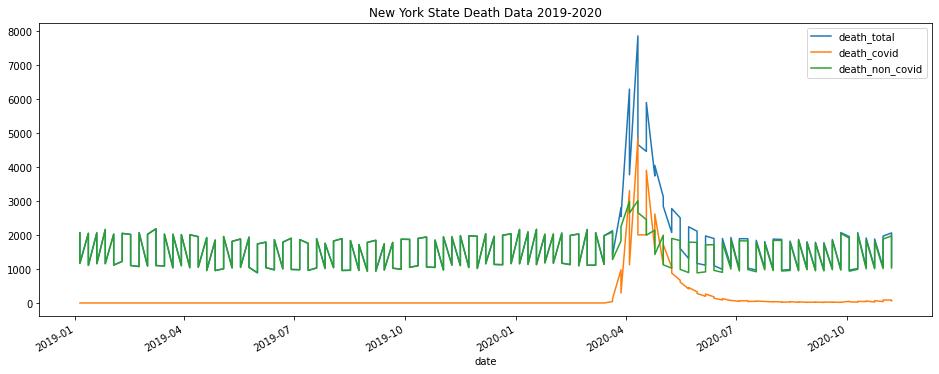

In [11]:
# --------------------- Data Visualization ---------------------
# View 1 - New York Death from 2019
data[(data.index > '2019-01-01') & ((data["location"] == "New York") | (data["location"] == "New York City"))].plot(figsize=(16,6), title="New York State Death Data 2019-2020")

<AxesSubplot:title={'center':'California State Death Data 2019-2020'}, xlabel='date'>

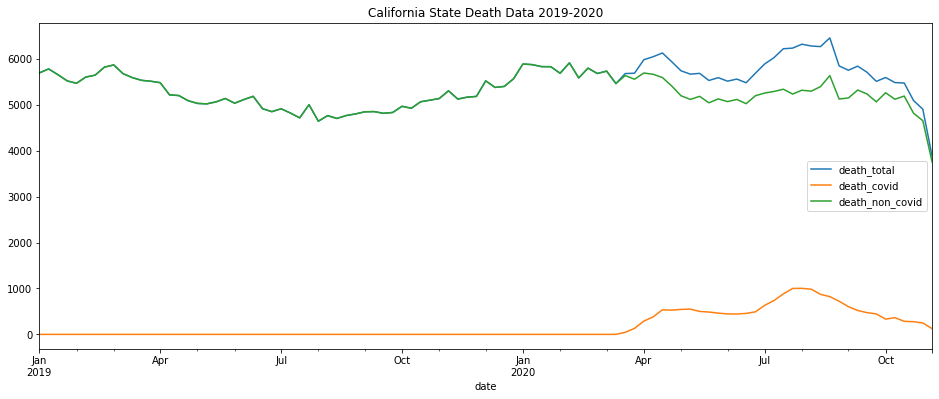

In [12]:
# View 2 - California Death from 2019
data[(data.index > '2019-01-01') & ((data["location"] == "California"))].plot(figsize=(16,6), title="California State Death Data 2019-2020")


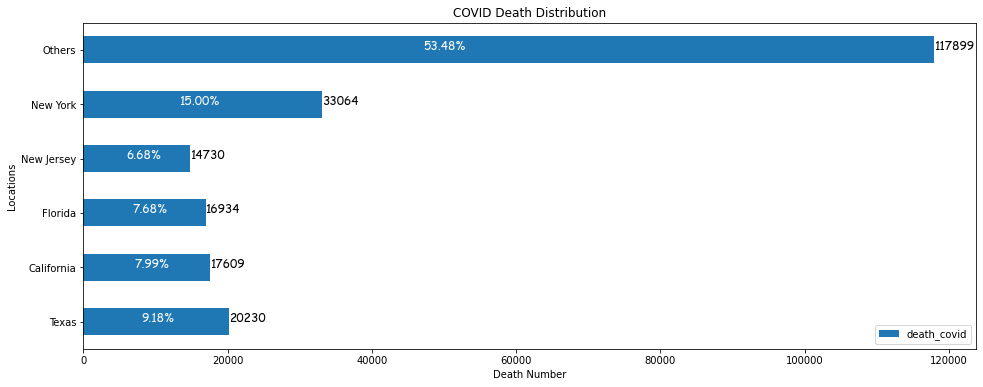

In [13]:
# View 3 - COVID Death Distribution
death_sum = data.loc[data["location"] != "United States", ["location", "death_covid"]].groupby("location").sum().sort_values("death_covid", ascending=False)
death_sum_ny = death_sum[(death_sum.index == "New York City") | (death_sum.index == "New York")].sum()
death_sum.at["New York", "death_covid"] = death_sum_ny
death_sum = death_sum.drop(["New York City"])
death_sum_top = death_sum.iloc[0:5]
death_sum_other = death_sum.iloc[6:].sum()
death_sum_other = death_sum_other.rename("Others")
death_sum_top = death_sum_top.append(death_sum_other)
total = death_sum_top.sum()[0]
fig, axs = plt.subplots(figsize=(16, 6))
death_sum_top.plot.barh(ax=axs, title="COVID Death Distribution")
axs.set_ylabel("Locations")
axs.set_xlabel("Death Number")
for index, value in enumerate(death_sum_top["death_covid"]):
    plt.text(value, index,  s=f"{value}", color="black", fontname='Comic Sans MS', fontsize=12)
    plt.text(value * 0.4, index, s="{0:.2f}%".format(value / total * 100), color="white", fontname='Comic Sans MS', fontsize=12)

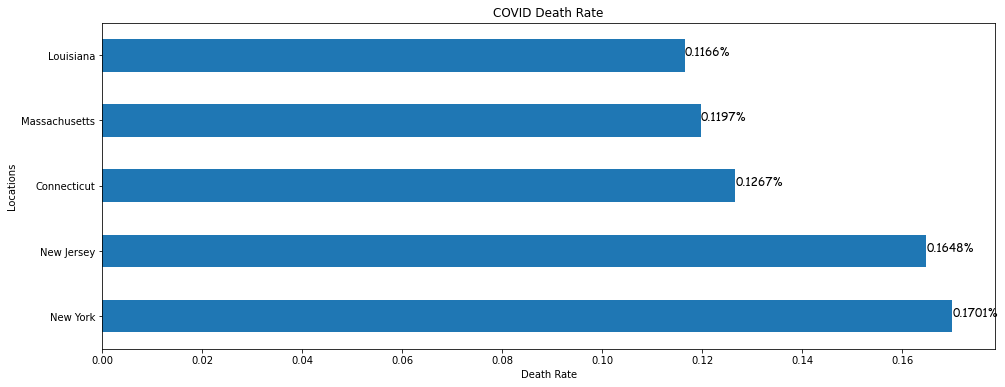

In [14]:
# View 4 - Covid Death Rate
population = pd.read_csv("population.csv", index_col="State")
population = population[["Pop"]]
death_sum["population"] = population
death_sum["death_rate_pct"] = death_sum["death_covid"] / death_sum["population"] * 100
death_rate = death_sum.sort_values("death_rate_pct", ascending=False)

death_rate_top = death_rate.iloc[0:5]
fig, axs = plt.subplots(figsize=(16, 6))
death_rate_top["death_rate_pct"].plot.barh(ax=axs, title="COVID Death Rate")
axs.set_ylabel("Locations")
axs.set_xlabel("Death Rate")
for index, value in enumerate(death_rate_top["death_rate_pct"]):
    plt.text(value, index,  s="{0:.4f}%".format(value), color="black", fontname='Comic Sans MS', fontsize=12)

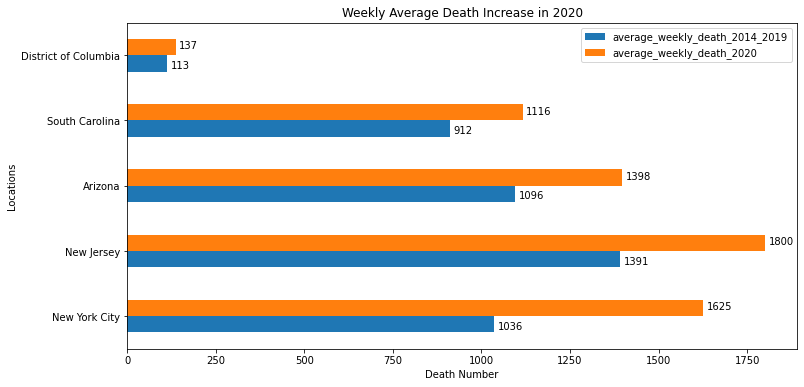

In [15]:
# View 5 - Weekly Average Death Increase in 2020
death_2014_2019 = data[(data.index > "2014-01-01") & (data.index < "2019-12-31")].groupby("location").mean()
death_2020 = data[data.index > "2020-01-01"].groupby("location").mean()
data_avg_death = pd.DataFrame({"average_weekly_death_2014_2019" : death_2014_2019["death_total"], "average_weekly_death_2020" : death_2020["death_total"]}).astype('int64')
data_avg_death["increase"] = data_avg_death["average_weekly_death_2020"] / data_avg_death["average_weekly_death_2014_2019"]
data_avg_top5 = data_avg_death[data_avg_death.index != "United States"].sort_values("increase", ascending=False).head(5)
data_avg_national = data_avg_death[data_avg_death.index == "United States"]
data_avg = pd.concat([data_avg_top5, data_avg_national], axis=0)
fig, axs = plt.subplots(figsize=(12, 6))
data_avg_top5[["average_weekly_death_2014_2019", "average_weekly_death_2020"]].plot.barh(ax=axs, title="Weekly Average Death Increase in 2020")
axs.set_ylabel("Locations")
axs.set_xlabel("Death Number")
for index, value in enumerate(data_avg_top5["average_weekly_death_2014_2019"]):
    plt.text(value + 10, index - .2,  s=f"{value}")
for index, value in enumerate(data_avg_top5["average_weekly_death_2020"]):
    plt.text(value + 10, index + .1,  s=f"{value}")

In [16]:
# --------------------- Data Persistence ---------------------
import h5py
file = h5py.File('result.h5','w')
g1 = file.create_group("death_data")
g2 = file.create_group("weekly_average_death")
g3 = file.create_group("covid_death_summary")
file.close()

# Save death data 2014-2020
data.to_hdf('result.h5', key='death_data', mode='a')

# Save weekly average death data
data_avg_top5.to_hdf('result.h5', key='weekly_average_death', mode='a')

# Save covid death summary data
death_sum_top.to_hdf('result.h5', key='covid_death_summary', mode='a')

# Save covid death rate data
death_rate_top.to_hdf('result.h5', key='covid_death_rate', mode='a')